In [104]:
from elasticsearch import Elasticsearch
from deepface import DeepFace
import matplotlib.pyplot as plt
from retinaface import RetinaFace
import os
import time
import glob

In [105]:
es = Elasticsearch(hosts=['http://localhost:9200'], http_auth=('elastic', 'DkIed99SCb'))

In [106]:
model_name = 'ArcFace'
target_size = (160, 160)
embedding_size = 512

In [107]:
target_img_path = "dataset/targets/6.jpg"
embedding_objs = DeepFace.represent(img_path = target_img_path, 
  model_name = model_name,
  detector_backend = 'retinaface'
)
target_embedding = embedding_objs[0]["embedding"]

In [108]:
query = {
    "size": 10,
    "query": {
    "script_score": {
        "query": {
            "match_all": {}
        },
        "script": {
            #"source": "cosineSimilarity(params.queryVector, 'title_vector') + 1.0",
            "source": "1 / (1 + l2norm(params.queryVector, 'title_vector'))", #euclidean distance
            "params": {
                "queryVector": list(target_embedding)
            }
        }
    }
}}

In [109]:
tic = time.time()
res = es.search(index="policedb2", body=query)
toc = time.time()

print(toc-tic," seconds")

0.06674790382385254  seconds


In [110]:
for i in res["hits"]["hits"]:
    candidate_name = i["_source"]["title_name"]
    candidate_score = i["_score"]
    print(candidate_name, candidate_score)


dataset/police/2008016.jpg 0.2254871
dataset/police/2006061.jpg 0.22243847
dataset/police/2106148.jpg 0.22002779
dataset/police/2101006.jpg 0.21965475
dataset/police/2206084.jpg 0.21836188
dataset/police/1806104.jpg 0.21789676
dataset/police/2102010.jpg 0.21552429
dataset/police/2108078.jpg 0.2149807
dataset/police/2215007.jpg 0.21493675
dataset/police/2206042.jpg 0.21425736


dataset/police/2008016.jpg 0.2254871


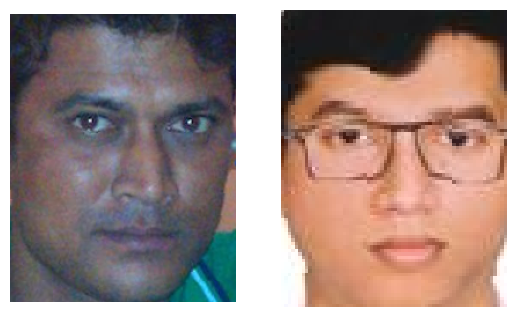

dataset/police/2006061.jpg 0.22243847


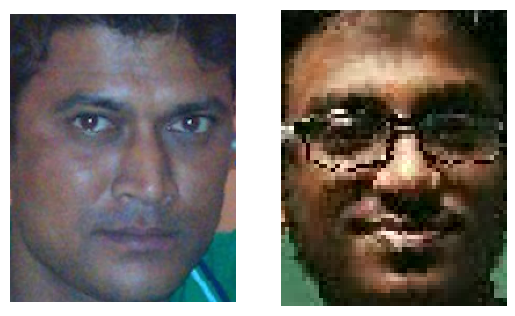

dataset/police/2106148.jpg 0.22002779


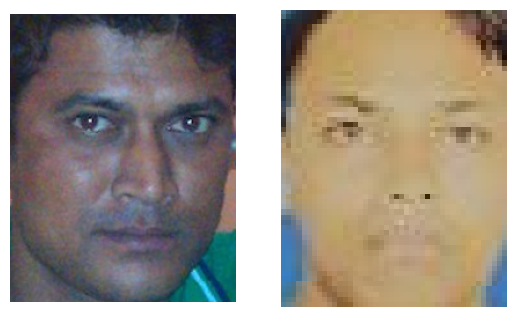

dataset/police/2101006.jpg 0.21965475


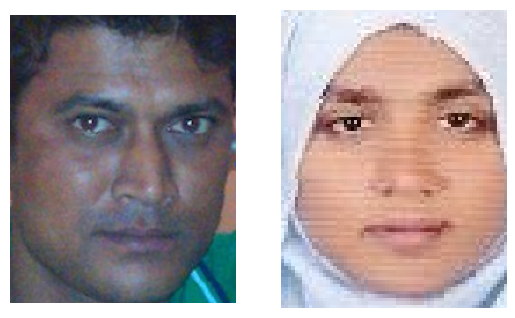

dataset/police/2206084.jpg 0.21836188


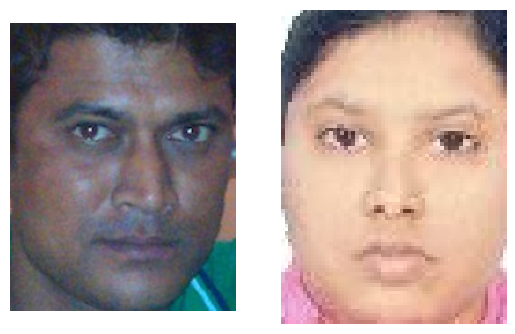

dataset/police/1806104.jpg 0.21789676


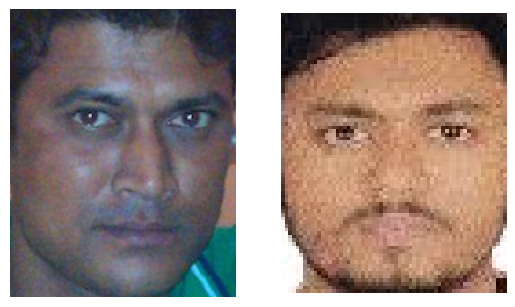

dataset/police/2102010.jpg 0.21552429


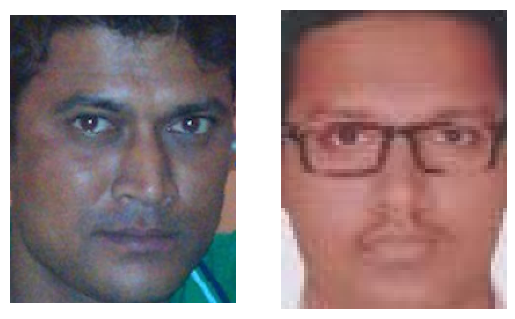

dataset/police/2108078.jpg 0.2149807


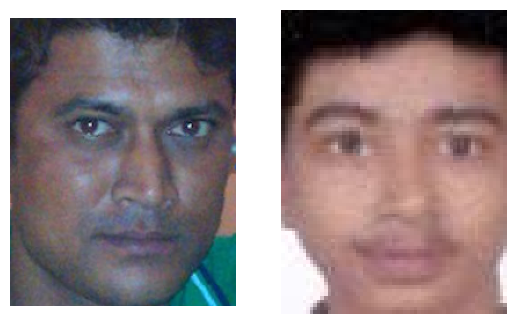

dataset/police/2215007.jpg 0.21493675


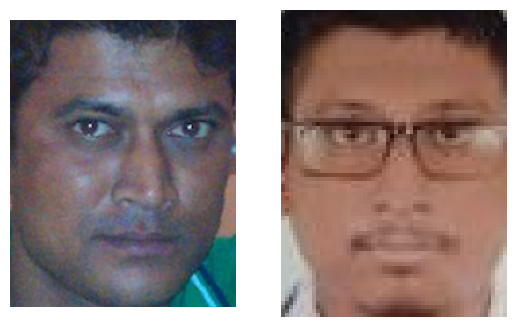

dataset/police/2206042.jpg 0.21425736


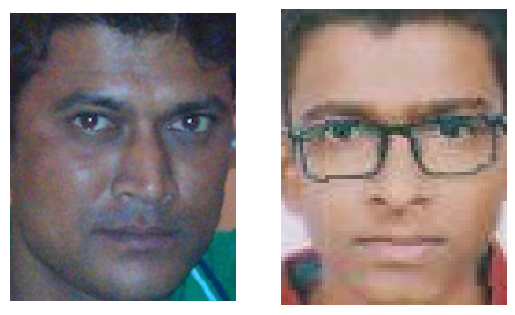

In [111]:
target_faces = RetinaFace.extract_faces(img_path = target_img_path, align = True)
target_img = target_faces[0]

for i in res["hits"]["hits"]:
    candidate_name = i["_source"]["title_name"]
    candidate_score = i["_score"]
    print(candidate_name, candidate_score)
    candidate_faces = RetinaFace.extract_faces(img_path = candidate_name, align = True)
    candidate_img = candidate_faces[0]

    fig = plt.figure()

    ax1 = fig.add_subplot(1, 2, 1)    
    plt.imshow(target_img)
    plt.axis('off')

    ax2 = fig.add_subplot(1, 2, 2)
    plt.imshow(candidate_img)
    plt.axis('off')

    plt.show()